In [85]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
from scipy import stats
%matplotlib inline

# Loading and saving matlab files:



In [84]:


from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('filemat', {'a': a}) #savemat expects a dictionsary
data = spio.loadmat('filemat', struct_as_record=True)
data['a']


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

# Special Functions : Scipy.speacial

special funcitons are trancscendental functions. The docstring of the scipy.

special module is well-written, so we won't list all functions here. Frequently used ones are:

- Bessel function, such as scipy.special.jn()(nth integer order bessel function)
- Elliptic function (scipy.special.ellipj() for the jacobian elliptic function...)
- Gamma function: Scipy.special.gamma(), also note scipy.special,gammaln() which will give the log of Gamma to a higher numerical precionsion.
- Erf, the area uner a Gaussian curve: Scipy.special.erf()




# Linear Algebra operations: Scipy.linalg

The [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) module proivides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK)

- The [scipy.linalg.det()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det) function computes the determinant of a square matrix:


In [16]:
from scipy import linalg
arr = np.array([[1, 2], [3, 4]])
print (linalg.det(arr))
arr = np.array([[3, 2], [6, 4]])

print (linalg.det(arr))

linalg.det(np.ones((3, 4)))

-2.0
0.0


ValueError: expected square matrix

- The scipy.linalg.inv() function computes the inverse of a square matrix:

In [21]:
arr = np.array(([[1, 2], [3, 4]]))
iarr = linalg.inv(arr)
print (iarr)

print (np.allclose(np.dot(arr, iarr), np.eye(2)))


[[-2.   1. ]
 [ 1.5 -0.5]]
True


- More advanced operations are available, for example singular-value decomposition (SVD):


In [27]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])

uarr, spec, vharr = linalg.svd(arr)

The resulting array spectrum is:

In [28]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

The original matrix can re re-composed by a matrix multiplcation of the outputs of > svd with *np.dot >

In [29]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)


True

# Fast Fourier Transforms: Scipy.fftpack

The Scipy.fftpack module allows to compute fast Fourier transforms. As an illustration, a (noisy) input signmal may look like:


In [52]:
time_step = .02
period = 5
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    

The observer doesn’t know the signal frequency, only the sampling time step of the signal sig. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The [scipy.fftpack.fftfreq()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) function will generate the sampling frequencies and [scipy.fftpack.fft()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft) will compute the fast Fourier transform:

In [53]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [54]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

The signal frequency can be found by

In [55]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period) # check that correct freq is found 

True

Now the high-frequency noise will be removed from the Fourier tranformed signal:


In [56]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the [scipy.fftpack.ifft()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft)function:

In [57]:
main_sig = fftpack.ifft(sig_fft)

The result can be viewed with:

C:\Users\ElPanda\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


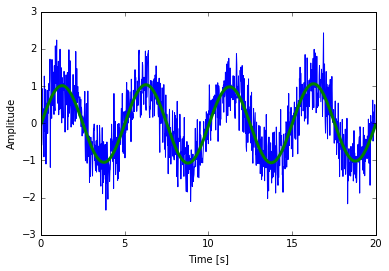

In [51]:
import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Numpy.fft
Numpy also has an implrementation of FFT ([numpy.fft](http://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)). However, in general the scipy one should be preferred, as it uses more efficient underlying implementataions.


# Optimization and fit: Scipy.optimize

Optimization is the problem of finding a numberical solution to a minimization or equality.

The [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) module provides useful alorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [59]:
from scipy import optimize

**Finding the minimum of a scalar function**

Let's define the following function:



In [60]:
def f(x):
    return x**2 + 10*np.sin(x)

and plot it


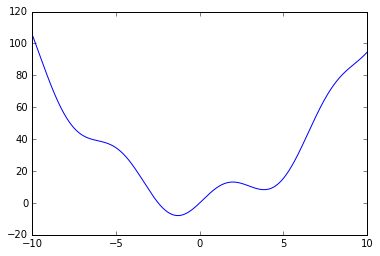

In [61]:
x = np.arange(-10, 10, .01)
plt.plot(x, f(x))
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The BFGS algorithm is a good way of doing this:

In [62]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point.

In [67]:
optimize.fmin_bfgs(f, 3, disp=0)

array([ 3.83746709])

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization.

To find the global minimum, we use [scipy.optimize.basinhopping()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping) (which combines a local optimizer with stochastic sampling of starting points for the local optimizer):


New in version 0.12.0: basinhopping was added in version 0.12.0 of Scipy

In [66]:
optimize.basinhopping(f, 0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08582305]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1530
                        nit: 100
                       njev: 510
                          x: array([-1.30644001])

# Finding the roots of a scalar function

To find a root i.e. a point where $f(x) = 0$, of the function $f$ above we can use for example [scipy.optimize.fsolve](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve):

In [68]:
root = optimize.fsolve(f, 1) # our initial guess is 1
root

array([ 0.])

Note that only one root is found. Inspecting the plot of $f$ reveals that there is a second root around -2.5 we find the exact value of it by adjusting our initial guess:

In [71]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Curve Fitting

suppose we have data sampled from $f$ with some noise:

In [73]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.rand(xdata.size)

Now if we know the functional form of the function from which the samples were dranw ($X^2 + sin(x)$in this case) but not the amplitudes of the terms, we can find those by lease squares curve fitting.

First we have to define the function to fit:

In [75]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use scipy.optimize.curve_fit() to find $a$ and $b$

In [76]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([  1.00820324,  10.17659173])

Now we have found the minima and roots of **f** and used curve fitting on it, we put all those results together:

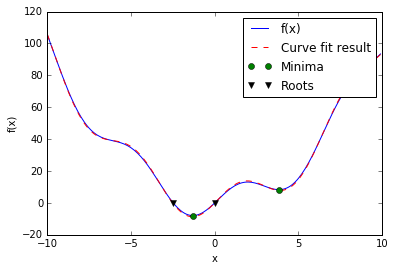

In [82]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)


grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, num=20)
np.random.seed(1234)
ydata = f(xdata) + np.random.randn(xdata.size)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')


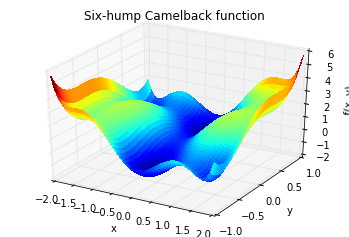

In [87]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

#plt.figure()  # simple visualization for use in tutorial
#plt.imshow(sixhump([xg, yg]))
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')



# Statistics and random numbers : scipy.stats

The module scipy.stats contains statistical tools and probalistic descriptions of random processes. Random number generators for various random process can be found in numpy.random

## Histogram and probability density function

Given observations of random process, their histogram is an estimator of the random processe's PDF (probability density function):


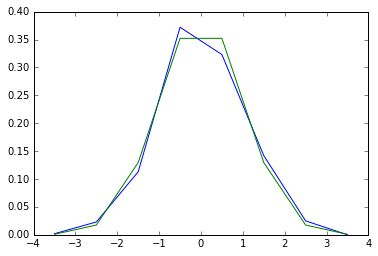

In [99]:
a = np.random.normal(size = 1000)
bins = np.arange(-4, 5)
bins

histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = .5*(bins[1:] + bins[:-1])
bins

from scipy import stats

b = stats.norm.pdf(bins) # norm = distribution
plt.plot(bins, histogram)
plt.plot(bins, b)

If we know that the random process belongs to a given family of random processes, such as normal processes, we can do a maximum-likelihood fit of the observations to estimate the parameters of the underlying distribution. Here we fit a normal process to the observed data:

In [102]:
loc, std = stats.norm.fit(a)
print (loc)
print (std)

0.0087308215678
0.98793410359


Statistical tests

A statistical test is a decision indicatior. For instance, if we have two sets of observations, that we assume are generated from the Gaussian processses, we can use a [T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test) to decide whether the two sets of observations are significantly different:

In [103]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-1.293207366731272, pvalue=0.1986986984888465)


The resulting out is composed of:

- The **T Statistic value**: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.

- The **p value**: The probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The close it is to zero, the more likely it is that the processes have different means.

# Interpolation: Scipy.interpolate

The scipy.interpolate is useful for fitting a function from the experiemental data and this evaluating points where no measure exists. The module is based on the [FITPACK Fortran subroutines](http://www.netlib.org/dierckx/index.html) from the [netlib](http://www.netlib.org/) project.

By imagining experimental data close to a sine function:



In [107]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise 

The [scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) class can build a linear interpolation function:

In [110]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the scipy.interpolate.linear_interp instance needs to be evaluated at the time of interest:

In [114]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

A cubic interpolation can also be selected by providing the Kind of optional keyword argument:

In [116]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

Now let's put all of this into a graph.



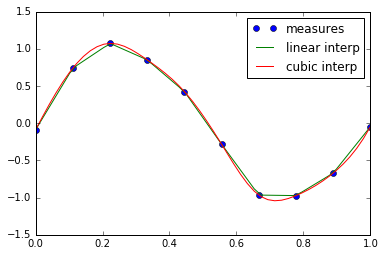

In [117]:
"""Generate the interpolation.png image for the interpolate
section of the Scipy tutorial
"""

import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')
pl.legend()


[scipy.interpolate.interp2d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) is similiar to [scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d), but for 2-D arrays. Note that for the interp family, the comuputed time must stay within the measured time range. See the summary exercise on the [Maximum wind speed prediction at the Sprogo station](http://www.scipy-lectures.org/intro/summary-exercises/stats-interpolate.html#summary-exercise-stat-interp) for a more advanced spline interpolation example.

# Numerical integration: scipy.integrate

The most generic integration routine is scipy.integrate.quad():

In [118]:
from scipy.integrate import quad
res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)
print (np.allclose(err, 1 - res))

True

Others integration schemes are available with fixed_quad, quadrature, romberg

[Scipy.integrate]() also features routines for integrating Ordinary Differential Equations (ODE). In particular, [()]() is a general_purpose integrator using LSODA (Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff & non-stiff problems), see the [ODEPACK fortrain library]() for more details.

**odeint ** solvles first-order ODE systems of the form:

As an introduction, let us solve the ODE $dy/dt = -2y$ between $t - 0 ... 4$ with the initial condition $y(t = o)=1$. First the function computing the derivative of the position needs to be defined:


In [120]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

An extra argument ** counter_arr** has been added to illustrate that the function may be called several times for single time step, until solver convergence. The counter array is defined as:


In [122]:
counter = np.zeros((1,), dtype=np.uint16)

The trajectory will now be computed:

In [124]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec, args=(counter,), full_output=True)

Thus the derivative function has been called more than 40 times (which was the number of time steps):

In [125]:
counter

array([129], dtype=uint16)

and the cumulative number of iterations for each of the 10 first time stephs can be obtained:

In [126]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

Note that the solver requires more iterations for the first time step. The solution yvec for the trajectory can now be plotted:

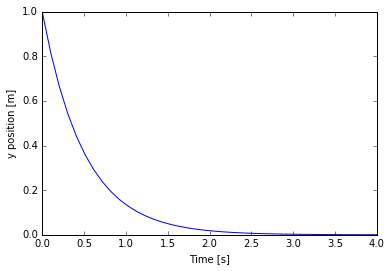

In [127]:
"""Solve the ODE dy/dt = -2y between t = 0..4, with the
initial condition y(t=0) = 1.
"""

import numpy as np
from scipy.integrate import odeint
import pylab as pl

def calc_derivative(ypos, time):
    return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

pl.plot(time_vec, yvec)
pl.xlabel('Time [s]')
pl.ylabel('y position [m]')



Geometrical transformations on images

Changing orientation, resolution...


In [ ]:
from scipy import misc
#face = misc.face(gray=True)
#shifted_face = ndimage.shift(face, (50, 50))
#help(scipy)

In [ ]:
help(misc)
